<a href="https://colab.research.google.com/github/robomoan/Data_Science_Study/blob/main/Handson_ML/handson_ml_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 핸즈온 머신러닝 4장
## 모델 훈련

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 선형 회귀

In [2]:
# 선형 회귀 데이터 생성
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

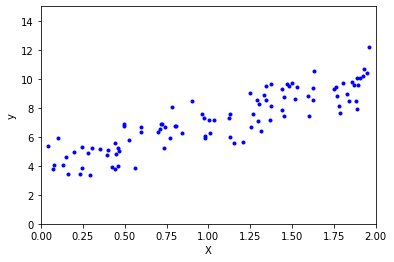

In [3]:
# X 와 y 사이의 산점도 그리기
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.xlabel("X")
plt.ylabel("y")
plt.show()

정규 방정식: $\hat{\theta} = (X^{T}X)^{-1}X^{T}y$

In [4]:
# X 행렬에 1로만 이루어지 열 추가(절편)
X_b = np.c_[np.ones((100, 1)), X]

# 정규 방정식
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
# 결과 확인
theta_best

array([[3.90280264],
       [3.07815816]])

실제 값: $\theta_{0}$ = 4, $\theta_{1}$ = 3

In [6]:
# theta_best를 사용하여 예측하기
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.90280264],
       [10.05911895]])

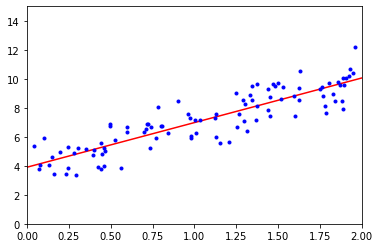

In [7]:
# 모델의 예측 그래프에 표시

# 두 예측 점을 이으면 회귀 직선이 된다.
plt.plot(X_new, y_predict, "r-") # 빨간색 선
plt.plot(X, y, "b.") # 파란색 점
plt.axis([0, 2, 0, 15]) # x축은 0에서 2까지, y축은 0에서 15까지
plt.show()

사이킷런에서 선형 회귀 이용

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [9]:
# 회귀 직선의 절편과 기울기
lin_reg.intercept_, lin_reg.coef_

(array([3.90280264]), array([[3.07815816]]))

In [10]:
# 회귀 직선으로 예측하기
lin_reg.predict(X_new)

array([[ 3.90280264],
       [10.05911895]])

유사 역행렬 이용  
SVD: $X = U \Sigma T^{T}$ 에서  
$X$의 유사역행렬 $X^{+} = T \Sigma U^{T}$  
$\hat{\theta} = X^{+} y$

In [11]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.90280264],
       [3.07815816]])

In [12]:
# 유사역행렬 이용하여 직접 구하기
np.linalg.pinv(X_b).dot(y)

array([[3.90280264],
       [3.07815816]])

### 경사하강법

배치 경사하강법  
$\nabla_{\theta} \text{MSE} (\theta)= \frac{2}{m} X^{T}(X \theta - y)$  
$\theta^{+} = \theta - \eta \nabla_{\theta} \text{MSE}$ 

In [13]:
# 배치 경사하강법
eta = 0.1 # 학습률
n_iterations = 1000 # 반복 횟수
m = 100 # 샘플 개수

theta = np.random.randn(2, 1) # theta의 초기값 무작위 초기화

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients

In [14]:
theta

array([[3.90280264],
       [3.07815816]])

확률적 경사 하강법

In [15]:
# 확률적 경사 하강법
n_epochs = 50 # 에포크 횟수
t0, t1 = 5, 50 # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
  return t0 / (t + t1)

theta = np.random.randn(2, 1) # theta의 초기값 무작위 초기화

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m) # 0~m-1 사이에 랜덤하게 정수 하나 뽑음
    xi = X_b[random_index: random_index+1] # 뽑힌 수를 인덱스 값으로 갖는 샘플 (랜덤 샘플)
    yi = y[random_index: random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi) # 그래디언트 구하기
    eta = learning_schedule(epoch * m + i) # 학습률 구하기, 에포크에 반비례, 타임 스텝에 반비례
    theta = theta - eta * gradients # theta 업데이트

In [16]:
theta

array([[3.9567566 ],
       [3.06006699]])

In [18]:
# 사이킷런을 이용하여 확률적 경사하강법 사용하기
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [19]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.9358345]), array([3.17561196]))

### 다항회귀

In [22]:
# 2차방정식꼴 비선형 데이터 생성
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

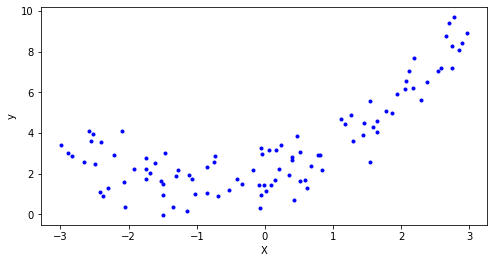

In [25]:
plt.figure(figsize=(8, 4))
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [27]:
# 2차식을 훈련세트의 새로운 특성으로 추가
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias = False)
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]

(array([-1.4954851]), array([-1.4954851 ,  2.23647568]))

In [28]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.90896396]), array([[0.93716816, 0.50129924]]))

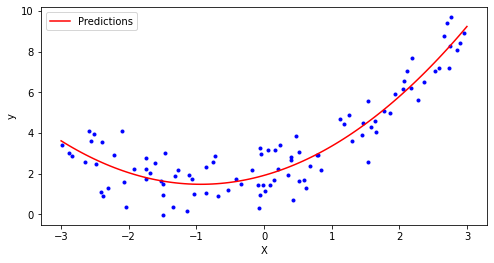

In [33]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(8, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", label = "Predictions")
plt.xlabel("X")
plt.ylabel("y")
plt.legend(loc = "upper left")
plt.show()

### 학습곡선

In [38]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val[:m])
    train_errors.append(mean_squared_error(y_train[:m] ,y_train_predict))
    val_errors.append(mean_squared_error(y_val[:m], y_val_predict))
  plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Train set")
  plt.plot(np.sqrt(val_errors), "b-", linewidth=2, label="Validation set")

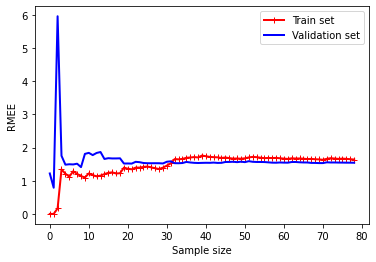

In [40]:
lin_reg = LinearRegression()

plot_learning_curves(lin_reg, X, y)
plt.xlabel("Sample size")
plt.ylabel("RMEE")
plt.legend(loc="upper right")
plt.show()

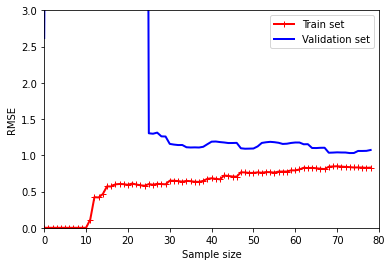

In [46]:
# 10차 다항 회귀 모델의 학습곡선
from sklearn.pipeline import Pipeline

poly_regression = Pipeline([
                            ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                            ("lin_reg", LinearRegression())
])

plot_learning_curves(poly_regression, X, y)
plt.xlabel("Sample size")
plt.ylabel("RMSE")
plt.axis([0, 80, 0, 3])
plt.legend(loc="upper right")
plt.show()

### 규제

#### 릿지
비용함수    
$J(\theta) = MSE(\theta) + \alpha \frac{1}{2} \sum_{i=1}^{n} \theta _{i}^{2}$  
  
정규방정식  
$\hat{\theta} = (X^{T}X + \alpha A)^{-1} X^{T}y$

In [30]:
# 릿지 규제
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.81081312]])

In [31]:
ridge_reg.intercept_, ridge_reg.coef_

(array([3.35216768]), array([[0.97243029]]))

#### 라쏘
비용함수  
$J(\theta) = MSE(\theta) + \alpha \sum_{i=1}^{n} \left | \theta_{i} \right |$

In [48]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.76409153])

In [49]:
lasso_reg.intercept_, lasso_reg.coef_

(array([3.35247258]), array([0.9410793]))

#### 엘라스틱넷
비용함수  
$J(\theta) = MSE(\theta) + \gamma \alpha \sum_{i=1}^{n} \left| \theta_{i} \right| + \frac{1-\gamma}{2} \alpha \sum_{i=1}^{n} \theta_{i}^{2}$

In [52]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio = 0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.76559021])

In [53]:
elastic_net.intercept_, elastic_net.coef_

(array([3.3524628]), array([0.94208494]))

### 조기종료

In [57]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

poly_scaler = Pipeline([
                        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
                        ("std_scaler", StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter = 1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled, y_train)
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val, y_val_predict)
  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

### 로지스틱 회귀

In [59]:
# Iris 데이터 불러오기
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [63]:
# 열 순서: sepal length, sepal width, petal length, petal width
iris["data"][:5, :]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [65]:
# 0: Setosa, 1: Versicolor, 2: Virginica
iris["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [66]:
# X: petal width
X = iris["data"][:, 3:]

# y: Virginica
y = (iris["target"] == 2).astype(np.int)

In [68]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

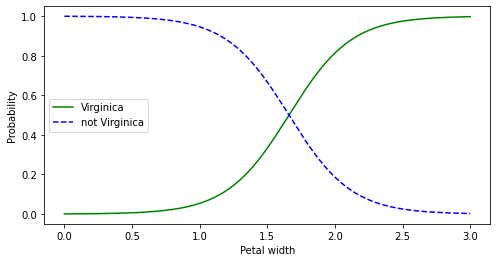

In [73]:
X_new = np.linspace(0, 3, 1000). reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.figure(figsize = (8, 4))
plt.plot(X_new, y_proba[:, 1], "g-", label = "Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label = "not Virginica")
plt.xlabel("Petal width")
plt.ylabel("Probability")
plt.legend(loc = "center left")
plt.show()

#### 다항 로지스틱 회귀
소프트맥스 회귀

In [74]:
# X: petal length, petal width
X = iris["data"][:, (2, 3)]

# y: type of Iris
y = iris["target"]

In [75]:
# multinomial: 소프트맥스 회귀 사용, lbfgs: 알고리즘명, C: L2 규제
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [77]:
# 0: Setosa, 1: Versicolor, 2: Virginica 예측
softmax_reg.predict([[5, 2]])

array([2])

In [78]:
# 예측 확률
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])